### Importing libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Methods

Since the problems need us to use the same methods many time, first we will create a function that can take in any system of differential equation or equivalently a vector differential equation and numerically compute the solution using the specified methods.

In [80]:
def step(i,t,x,dydt,method,dt):
    if method=="Euler":
        k1 = dydt(t[i],x[i])*dt
        return x[i] + k1
    elif method=="RK2":
        k1 = dydt(t[i],x[i])*dt
        k2 = dydt(t[i]+dt,x[i]+k1)*dt
        return x[i] + (k1+k2)/2

def Numerical_Solver(
    x_0, # initial value. Can be a single value or numpy array
    dt,  # Interval \Delat t
    t_ini,t_max, # real values  
    dydt, # a function mapping x,t to the derivative
    methods=["Euler"],
    x_analytical=None, # analytical solution (function). If avaliable, compute errors too
    visualise=False, # if True, does some plotting
    variable_name=None,
    compute_error=True,
    compute_one_step_error=True,
):
    t = np.arange(t_ini, t_max, dt)
    N = t.shape[0] -1 # excluding the start value
    if isinstance(x_0,np.ndarray):
        d = x_0.shape[0] # dimension
    elif isinstance(x_0,list) or isinstance(x_0,tuple):
        d = len(x_0)
        x_0 = np.array(x_0)
    else:d =1
    X = {}
    if x_analytical is not None:
        try: x_analytical = x_analytical(t)
        except:x_analytical = np.array([x_analytical(t_i) for t_i in t])
        X["analytical"] = x_analytical
    for method in methods:
        if d > 1:x = np.zeros((N+1,d))
        else:x = np.zeros(N+1)
        x[0] = x_0
        for i in range(0,N):x[i+1] = step(i,t,x,dydt,method,dt)
        X[method] = x
        if x_analytical is not None:
            if compute_error:
                err = x_analytical -x
                X[method + " error"] = err
            if compute_one_step_error:
                x_one_step = x_analytical.copy() 
                for i in range(0,N):
                    x_one_step[i+1] = step(i,t,x_analytical,dydt,method,dt)
                err_one_step = x_analytical - x_one_step
                # err_one_step = - np.array([0] + [step(i,t,x_analytical,dydt,method,dt) for i in range(0,N)])
                X[method + " one step error"] = err_one_step
    if visualise and d == 1:
        plt.figure()
        for method in methods:
            plt.plot(t, X[method], label=method)
        if x_analytical is not None:
            plt.plot(t, x_analytical, label="analytical")
        plt.xlabel("$t$")
        if variable_name is not None:plt.ylabel(variable_name)
        plt.title("Numerical Solution (" + ",".join(methods) + ")")
        plt.legend()
        if compute_error and (x_analytical is not None):
            plt.figure()
            for method in methods:
                lbl = method + " error"
                plt.plot(t, X[lbl],label=lbl)
            plt.xlabel("$t$")
            plt.ylabel("error")
            plt.legend()
        if compute_one_step_error and (x_analytical is not None):
            plt.figure()
            for method in methods:
                lbl = method + " one step error"
                plt.plot(t, X[lbl],label=lbl)
            plt.xlabel("$t$")
            plt.ylabel("error")
            plt.legend()
        plt.show()
    return t,X


## Problem 1 : Radioactive Decay

We are given the differential equations

$$
\frac{d}{dt}N= - \frac{1}{\tau}N
$$

with the initial value $N(0) = N_0$ .

Moreover, we are also given the analytical solution:

$$
N(t) = N_0 e^{-t/\tau}
$$


### Part 1

We need to implement Euler's method with the values $N_0 = 1$ and $\tau = 1$. 

We need to do compute till $t_\text{max} = 5$ .

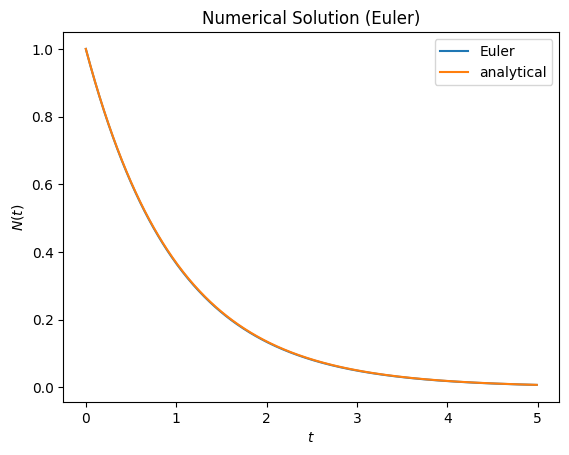

In [32]:
def RadioactiveDecay(
    N_0=1, tau=1, t_max=5, dt = None,
    precision_level = 100,
    visualise = False,
    methods = ["Euler"],
    compute_error = False,
    compute_one_step_error = False
    ):
    def dydt(t,N):return - N / tau
    def N(t):return N_0 * np.exp(-t/tau)
    if dt is None:dt = tau/precision_level
    t,results = Numerical_Solver(
        N_0,dt,0,t_max,dydt,
        methods=methods,
        x_analytical=N, # analytical solution (function). If avaliable, compute errors too
        visualise=visualise, # if True, does some plotting
        variable_name="$N(t)$",
        compute_error=compute_error,
        compute_one_step_error=compute_one_step_error
    )
    return t,results

t,res = RadioactiveDecay(visualise=True)

### Part 2

Now, we need to plot the numerical and exact solutions for several values of $\Delta t$ (`dt` in the code)

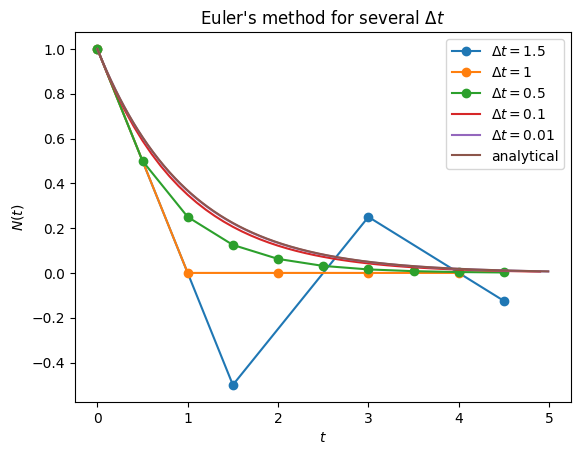

In [43]:
for dt in [0.01,0.1,0.5,1,1.5][::-1]:
    t,res = RadioactiveDecay(
        N_0 = 1,
        tau =1,
        t_max=5,
        dt = dt,
        visualise = False,
        methods=["Euler"]
    )
    ms = '-o' if dt >= 0.5 else '-'
    plt.plot(t,res["Euler"],ms,label=f"$\Delta t={dt}$")
plt.plot(t,res["analytical"],label="analytical")
plt.ylabel("$N(t)$")
plt.xlabel("$t$")
plt.legend()
plt.title("Euler's method for several $\Delta t$")
plt.show()

Looking at the solution only till $t_max = 5$ doesn't give us the full picture. So, let's extend it to 50.

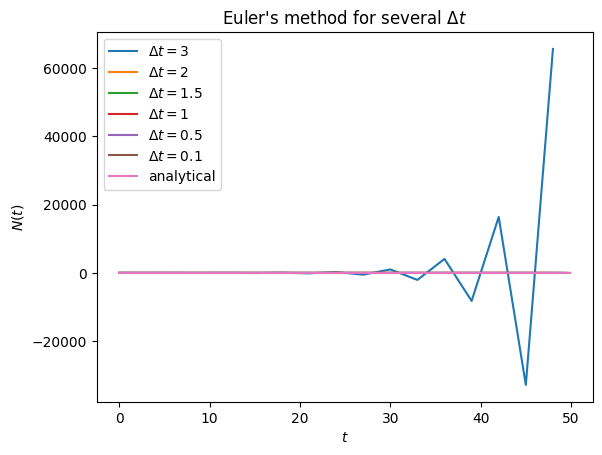

In [51]:
for dt in [0.1,0.5,1,1.5,2,3][::-1]:
    t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = dt,
        visualise = False,
        methods=["Euler"]
    )
    plt.plot(t,res["Euler"],label=f"$\Delta t={dt}$")
plt.plot(t,res["analytical"],label="analytical")
plt.ylabel("$N(t)$")
plt.xlabel("$t$")
plt.legend()
plt.title("Euler's method for several $\Delta t$")
plt.show()

The numeric solution is actually 

$$
N_\text{num}[n] = N_\text{num}(n \Delta t) = N_0 (1-\Delta t/\tau)^n
$$

It's easy to see that when $0 < \Delta t < 2\tau$, we have a decaying solution, namely 

$$
\lim_{n\to \infty} N_\text{num}[n] = 0
$$

Another easy thing to see is that if $\Delta t < \tau$ , then the numeric solution won't have flipping sign. 

To see this in action, let's plot the numerical solutions for $\Delta t$ equal to 0.5, 1.5 and 2.5 and $\tau = 1$.

#### $\Delta t = 0.5$

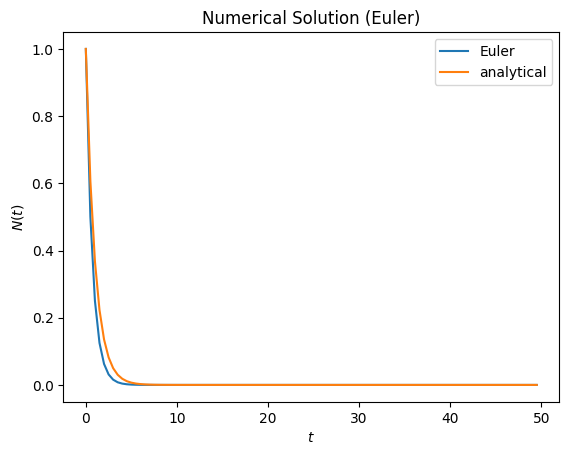

In [57]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 0.5,
        visualise = True,
        methods=["Euler"]
    )

#### $\Delta t = 1.5$

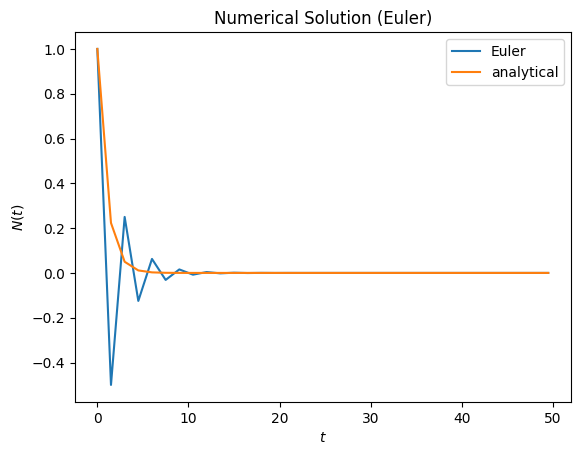

In [54]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 1.5,
        visualise = True,
        methods=["Euler"]
    )

#### $\Delta t = 2.5$

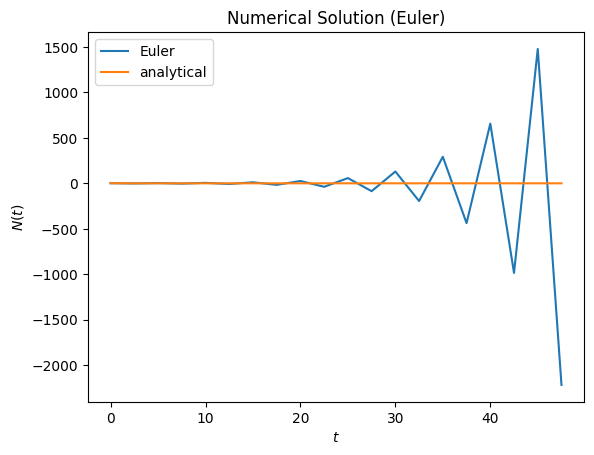

In [55]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 2.5,
        visualise = True,
        methods=["Euler"]
    )

### Part 3

Now, we need to compare between Euler's method and the RK2 method. First let's only compare for a single $\Delta t$. To be able to see the difference, let's use $\Delta t = 0.5$.

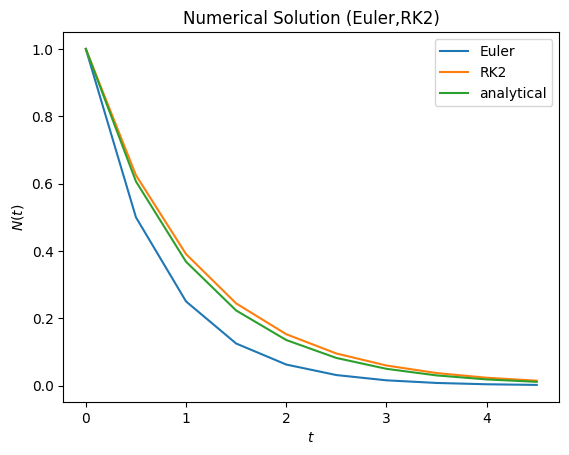

In [60]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau =1,
        t_max=5,
        dt = 0.5,
        visualise = True,
        methods=["Euler","RK2"]
    )

Now, we need to compare for some more $\Delta t$ values. Rather than putting it all in one plot, I will do it for some specific values only, which will make it easier for us to analyse.

#### $\Delta t = 0.5$

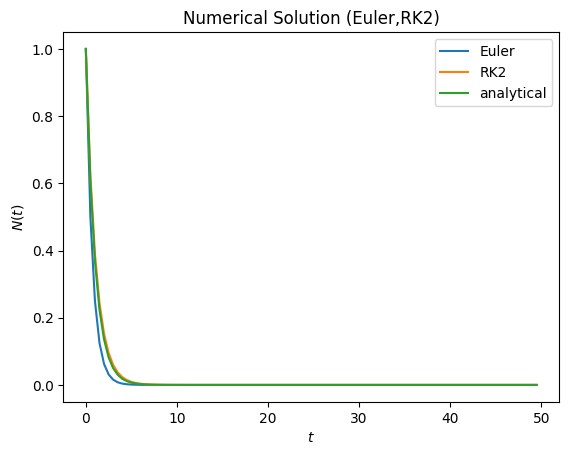

In [61]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 0.5,
        visualise = True,
        methods=["Euler","RK2"]
    )

#### $\Delta t = 1.5$

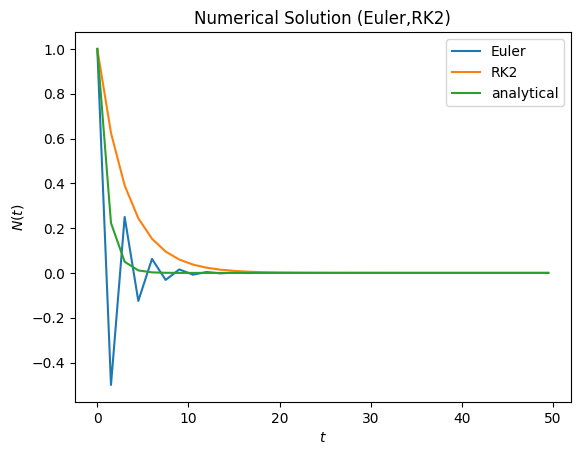

In [62]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 1.5,
        visualise = True,
        methods=["Euler","RK2"]
    )

#### $\Delta t = 2.5$

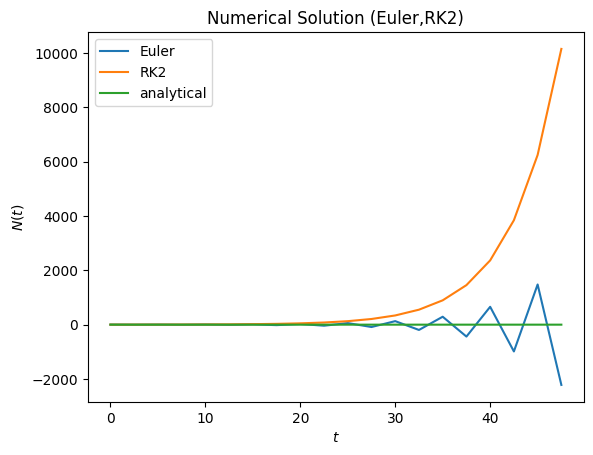

In [63]:
t,res = RadioactiveDecay(
        N_0 = 1,
        tau = 1,
        t_max=50,
        dt = 2.5,
        visualise = True,
        methods=["Euler","RK2"]
    )

### Part 4

Now, we need to plot the error in the final value (at $t_{max}$) computed by Euler and RK2 methods versus the time step $\Delta t$

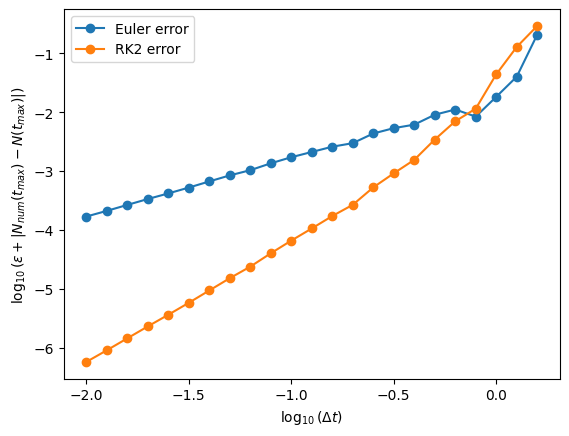

In [72]:
log10dt_list = np.arange(-2,0.3,0.1)
final_err_Euler = []
final_err_RK2 = []
for log10dt in log10dt_list: 
    t,res = RadioactiveDecay(
            N_0 = 1,
            tau = 1,
            t_max=5,
            dt = 10**log10dt,
            visualise = False,
            methods=["Euler","RK2"],
            compute_error = True
        )
    final_err_Euler.append(res["Euler error"][-1])
    final_err_RK2.append(res["RK2 error"][-1])
plt.plot(log10dt_list, np.log10(1e-20+np.abs(final_err_Euler)),'-o', label="Euler error")
plt.plot(log10dt_list, np.log10(1e-20+np.abs(final_err_RK2)),'-o', label="RK2 error")
plt.legend()
plt.xlabel("$\log_{10}(\Delta t)$")
plt.ylabel("$\log_{10}(\epsilon+|N_{num}(t_{max})-N(t_{max})|)$")
plt.show()

As you can see, the error for RK2 method is about twice as low as the Euler error on the log-scale. This is to be expected as the RK2 error in the final value is $O(t_\text{max}\Delta t^2)$ whereas, the Euler error is $O(t_\text{max}\Delta t)$.

### Part 5

The question is, why is it useful to solve a problem numerically even when the exact solution is known? 

There are two reasons I can think of:
1. To verify whether the analytical solution is correct. 
2. If the analytical solution has a very high complexity of calculation (think, having to compute the `exp` function), it might be easier to solve numerically.

### Part 6

Now, we want to compute the "single-step-error", which is the error intriduced by a single step, assuming the value before the step was accurate. 
We want to compare this error for RK2 and Euler's method and see if the error scales as $O(\Delta t^3)$ and $O(\Delta t^2)$ for the methods, respectively. 

First, I will simply plot this error for different $t$ values and a single $\Delta t$ (0.1) . 

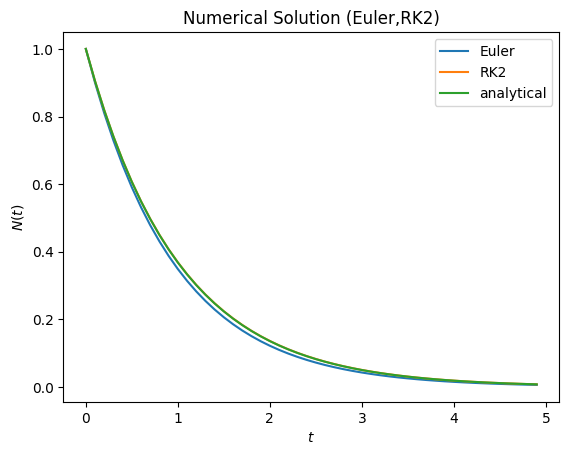

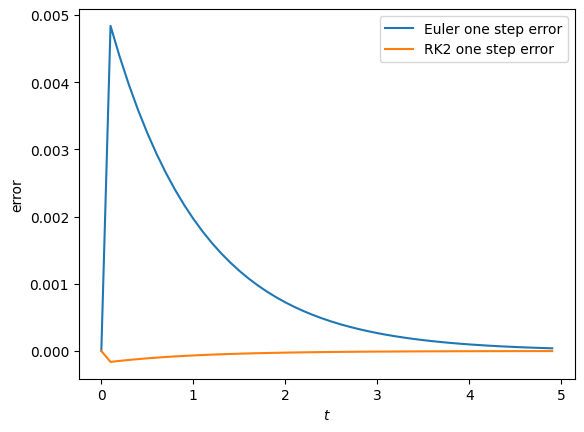

In [84]:
t,res = RadioactiveDecay(
            N_0 = 1,
            tau = 1,
            t_max=5,
            dt = 0.1,
            visualise = True,
            methods=["Euler","RK2"],
            compute_one_step_error = True
        )

Note the the numerical solution is still cmputed using the usual algorithm, with no involvement of the analytical solution. 

As you can see from the second plot, the one step error for RK2 is much lower than the error for Euler's method.

Now, to assess the dependence on $\Delta t$, I waill compute the one time error for steps at $t=0$ only. 
(This is what was given in the lab-sheet). 

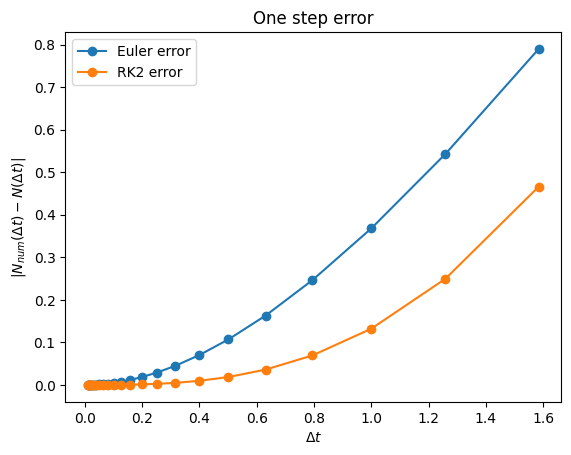

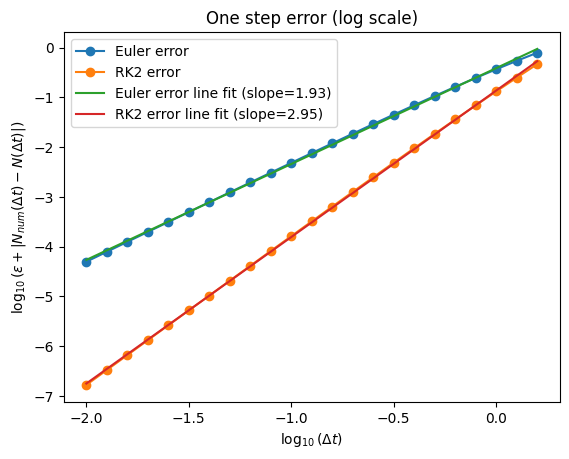

In [95]:
log10dt_list = np.arange(-2,0.3,0.1)
dt_list = 10**log10dt_list
one_step_err_Euler = []
one_step_err_RK2 = []

def dydt(t,N):
    tau =1
    return -N/tau

N_0 = 1
tau = 1

for dt in dt_list: 
    N_dt = N_0 * np.exp(-dt/tau)
    e_E = N_dt - step(i=0,t=[0],x=[N_0],dydt=dydt,method="Euler",dt=dt)
    e_RK2 = N_dt - step(i=0,t=[0],x=[N_0],dydt=dydt,method="RK2",dt=dt)
    one_step_err_Euler.append(e_E)
    one_step_err_RK2.append(e_RK2)

plt.plot(dt_list,np.abs(one_step_err_Euler),'-o', label="Euler error")
plt.plot(dt_list,np.abs(one_step_err_RK2),'-o', label="RK2 error")
plt.xlabel("$\Delta t$")
plt.ylabel("$|N_{num}(\Delta t)-N(\Delta t)|$")
plt.title("One step error")
plt.legend()
plt.figure()
log_scale_err_Euler = np.log10(1e-20+np.abs(one_step_err_Euler))
log_scale_err_RK2 = np.log10(1e-20+np.abs(one_step_err_RK2))
plt.plot(log10dt_list, log_scale_err_Euler,'-o', label="Euler error")
plt.plot(log10dt_list, log_scale_err_RK2,'-o', label="RK2 error")
x_de_trend = (log10dt_list - np.mean(log10dt_list))
var = np.sum(x_de_trend**2)
cov_E = np.sum(x_de_trend * (log_scale_err_Euler - np.mean(log_scale_err_Euler)))
slope_E = cov_E/var
intercept_E = np.mean(log_scale_err_Euler) - slope_E * np.mean(log10dt_list)
cov_RK2 = np.sum(x_de_trend * (log_scale_err_RK2 - np.mean(log_scale_err_RK2)))
slope_RK2 = cov_RK2/var
intercept_RK2 = np.mean(log_scale_err_RK2) - slope_RK2 * np.mean(log10dt_list)
plt.plot(log10dt_list, intercept_E + slope_E*log10dt_list, label=f"Euler error line fit (slope={slope_E:.2f})")
plt.plot(log10dt_list, intercept_RK2 + slope_RK2*log10dt_list, label=f"RK2 error line fit (slope={slope_RK2:.2f})")
plt.legend()
plt.xlabel("$\log_{10}(\Delta t)$")
plt.ylabel("$\log_{10}(\epsilon+|N_{num}(\Delta t)-N(\Delta t)|)$")
plt.title("One step error (log scale)")
plt.show()

In the log-log scale graph, we can clearly see that the slopes for the lines (fit on the one step error data) for Euler and RK2 methods are around 2 and 3 respectively. This is a clear indication of the $O(\Delta^2)$ and $O(\Delta t^3)$ dependences respectively.